In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import kneighbors_graph
import networkx as nx
from sklearn.metrics.pairwise import euclidean_distances, rbf_kernel
from scipy.linalg import eigvals as eigs
from numpy import linalg as LA
from sklearn.cluster import KMeans
import sys
from scipy.sparse.linalg import eigsh
from scipy.cluster.vq import kmeans2

In [3]:
def read_data_nodes(path,pos):
    x_tp = []
    y_tp = []
    label_pos_dict = {}
    with open(path) as f:
        for line in f:
            x, y = line.split(",")
            x = float(x)
            y = float(y)
            
            x_tp.append((pos[x][0],pos[x][1]))
            y_tp.append(y)

            # if y in label_pos_dict.keys():
            #     label_pos_dict[y] = np.append(label_pos_dict[y],np.array(x_tp[-1]))
            # else:
            #     label_pos_dict[y] = np.array(x_tp[-1])

                           
    data_knn = np.array(x_tp)
    return data_knn, y_tp

In [4]:
def read_dict_node_label(path, pos):
    x_tp = []
    y_tp = []
    nodes_labels = {}
    with open(path) as f:
        for line in f:
            x, y = line.split(",")
            x = float(x)
            y = float(y)
            
            #x_tp.append((pos[x][0],pos[x][1]))
            #y_tp.append(y)

            if x in nodes_labels.keys():
                nodes_labels[x].append(y)
                #print(nodes_labels[x])
            else:
                nodes_labels[x] = [y]

    print(len(nodes_labels.keys()))

    return nodes_labels

In [5]:
def read_edges(path):
    x_tp = []
    
    with open(path) as f:
        for line in f:
            x, y = line.split(",")
            x = float(x)
            y = float(y)
            x_tp.append( (x,y) )
            #pos[str(k)] = (x,y)
            #k = k+1
    #data_knn = np.array(x_tp)
    return x_tp
def Accuracy(target, predicted):
    for i in range(1,len(target.keys())+1):
        cnt = 0
        if predicted[i-1] in target[i]:
            cnt += 1
    print("Accuracy: ",cnt/len(target.keys()))

In [6]:
def Figure_plot_clusters_all(data, labels, name):
    #km = KMeans(n_clusters=4,init='k-means++',random_state=0)
    #km.fit_predict(G)
    plt.scatter(data[:,0], data[:,1], c=labels, cmap='rainbow', alpha=1, edgecolors='b')
    #print(km.labels_)
    
    plt.colorbar()

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()
    return None

def Figure_plot_clusters(data, G, name):
    km = KMeans(n_clusters=39,init='k-means++',random_state=0)
    km.fit_predict(G)
    #plt.scatter(data[:,0], data[:,1], c=km.labels_, cmap='rainbow', alpha=1, edgecolors='b',s = 400)
    print(km.labels_)
    Accuracy(data, km.labels_)
   
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()
    return None

In [8]:
####----main----####
Graph = nx.Graph()
    
edges = read_edges("D:\MSCS\GraphMining\GM_VE\gm_project\data\soc-BlogCatalog-ASU.edges")
print(len(edges))
# Adding edges to the grpah
Graph.add_edges_from(edges)
pos = nx.spring_layout(Graph, seed = 100) 
#print(pos)
node_label_dict = read_dict_node_label("D:\MSCS\GraphMining\GM_VE\gm_project\data\soc-BlogCatalog-ASU.node_labels",pos)
#exit()
#node_pos, labels = read_data_nodes("D:\MSCS\GraphMining\GM_VE\gm_project\data\soc-BlogCatalog-ASU.node_labels",pos)

#fig = plt.figure()
#Figure_plot_clusters_all(node_pos,labels,"clusters_plot")
#nx.draw(Graph,pos, node_size= 10)
#plt.show()
print("comptung LP")
Graph_Lp = nx.normalized_laplacian_matrix(Graph,pos)
print("computing values")

eigenvalues, eigenvectors = eigsh(Graph_Lp, k=130)
print(eigenvalues.shape)
print(eigenvectors.shape)

# k = 2
# eigen_matrix = np.zeros((Graph_Lp.todense().shape[0],k))
# for i in range(0,k):
#     eigen_matrix[:,i] = eigenvectors[:,i].transpose()

# Figure_plot_clusters(node_label_dict,eigen_matrix,"clustering")

333983
10312
comptung LP
computing values
(130,)
(10312, 130)


In [10]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [11]:
transform = TSNE  # PCA

trans = transform(n_components=2)
node_embeddings_2d = trans.fit_transform(eigenvectors)


In [12]:
dict_labels = read_dict_node_label("D:\MSCS\GraphMining\GM_VE\gm_project\data\soc-BlogCatalog-ASU.node_labels",pos)

10312


In [13]:
dict_labels

{28.0: [1.0, 2.0],
 32.0: [1.0],
 36.0: [1.0, 6.0],
 37.0: [1.0, 3.0, 8.0, 19.0],
 84.0: [1.0, 3.0],
 129.0: [1.0, 6.0, 8.0, 11.0, 16.0],
 138.0: [1.0],
 169.0: [1.0],
 172.0: [1.0, 19.0, 20.0],
 218.0: [1.0, 30.0],
 276.0: [1.0, 2.0],
 316.0: [1.0, 30.0],
 318.0: [1.0, 2.0, 13.0, 17.0],
 345.0: [1.0],
 359.0: [1.0, 19.0, 24.0, 30.0],
 391.0: [1.0],
 394.0: [1.0, 6.0],
 429.0: [1.0, 8.0, 19.0],
 506.0: [1.0, 24.0],
 566.0: [1.0, 4.0],
 592.0: [1.0, 9.0],
 595.0: [1.0, 8.0, 29.0],
 621.0: [1.0, 2.0, 9.0, 13.0, 17.0, 20.0, 23.0, 26.0],
 628.0: [1.0],
 728.0: [1.0, 30.0],
 742.0: [1.0, 6.0, 10.0, 18.0],
 749.0: [1.0],
 797.0: [1.0, 22.0],
 803.0: [1.0, 5.0, 11.0, 20.0],
 831.0: [1.0, 30.0],
 896.0: [1.0, 7.0],
 901.0: [1.0, 11.0, 19.0, 24.0],
 904.0: [1.0, 3.0, 18.0],
 912.0: [1.0, 30.0],
 1018.0: [1.0, 2.0, 6.0],
 1033.0: [1.0, 7.0, 10.0],
 1079.0: [1.0],
 1156.0: [1.0],
 1179.0: [1.0, 32.0],
 1397.0: [1.0],
 1439.0: [1.0, 7.0, 22.0],
 1538.0: [1.0],
 1637.0: [1.0],
 1644.0: [1.0, 5.0, 7

10312


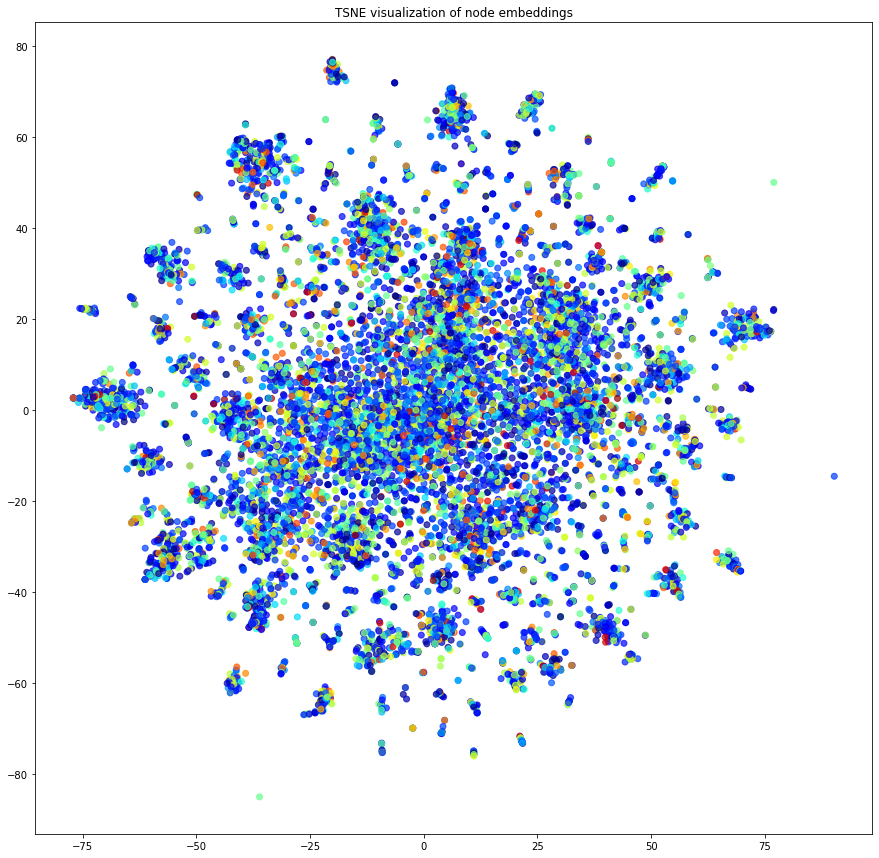

In [17]:
alpha = 0.7
dict_labels = read_dict_node_label("D:\MSCS\GraphMining\GM_VE\gm_project\data\soc-BlogCatalog-ASU.node_labels",pos)

#label_map = {l: i for i, l in enumerate(np.unique(node_targets))}
#node_colours = [label_map[target] for target in node_targets]
node_colours = [dict_labels[i][0] for i in range(1,10313)]

plt.figure(figsize=(15, 15))
plt.axes().set(aspect="equal")
plt.scatter(
    node_embeddings_2d[:, 0],
    node_embeddings_2d[:, 1],
    c=node_colours,
    cmap="jet",
    alpha=alpha,
)
plt.title("{} visualization of node embeddings".format(transform.__name__))
plt.show()